Importing the dependies

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Data loading and Understanding

In [82]:
# load the csv data to pandas dataframe
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [83]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
df.shape


(7043, 21)

In [85]:
pd.set_option('display.max_columns',None)

In [86]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [88]:
print(df['SeniorCitizen'].unique)

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64>


In [89]:
# prompt: # printing the unique values in all columns

for column in df.columns:
    print(column, df[column].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [90]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


len

In [91]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [92]:
len(df[df['TotalCharges']==" "])

11

In [93]:
# check the class distrubution of traget colund
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


**Insights**

1.  remove the customer id

2.no missing values in the datafarame,
missing values in the total charges were replaced by 0,
'class imblanced identified in the target






EDA

In [94]:
df.shape


(7043, 21)

In [123]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0


In [124]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


Numerical feature analysis

Understand the distribution of the numerical

In [125]:
def plot_hist(df,col):
  plt.figure(figsize=(10,6))
  sns.histplot(df[col],kde=True)
  plt.title(f"Distribution of {col}")
  # calulate the mean and median values for colums
  mean_value=df[col].mean()
  median_value=df[col].median()

  # print the mean and median values
  print(f"Mean value of {col}: {mean_value}")
  print(f"Median value of {col}: {median_value}")

  # add vertical lines for mean and median
  plt.axvline(mean_value,color='red',linestyle='dashed',label='Mean')
  plt.axvline(median_value,color='green',linestyle='dashed',label='Median')
  plt.legend()
  plt.show()

Mean value of tenure: 32.37114865824223
Median value of tenure: 29.0


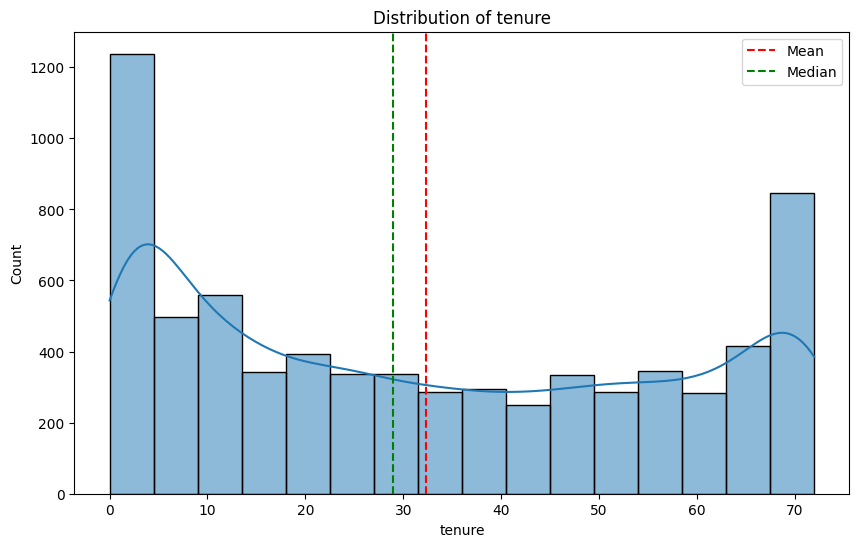

In [126]:
plot_hist(df,'tenure')

Mean value of MonthlyCharges: 64.76169246059918
Median value of MonthlyCharges: 70.35


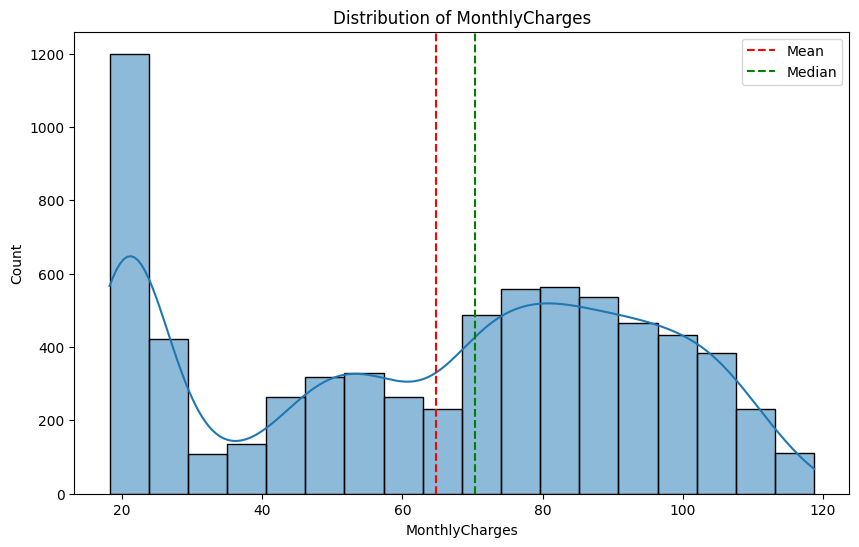

In [127]:
plot_hist(df,'MonthlyCharges')

Mean value of TotalCharges: 3257.7941218230867
Median value of TotalCharges: 3249.0


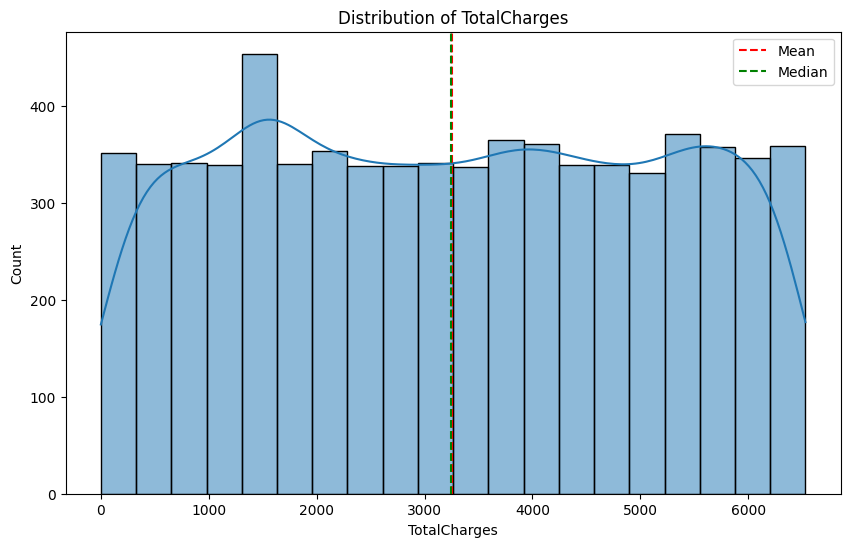

In [129]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
plot_hist(df,'TotalCharges')

In [130]:
# box plot numerical fetauers
def plot_box(df,col):
  plt.figure(figsize=(10,6))
  sns.boxplot(df[col])
  plt.title(f"Distribution of {col}")
  plt.show()


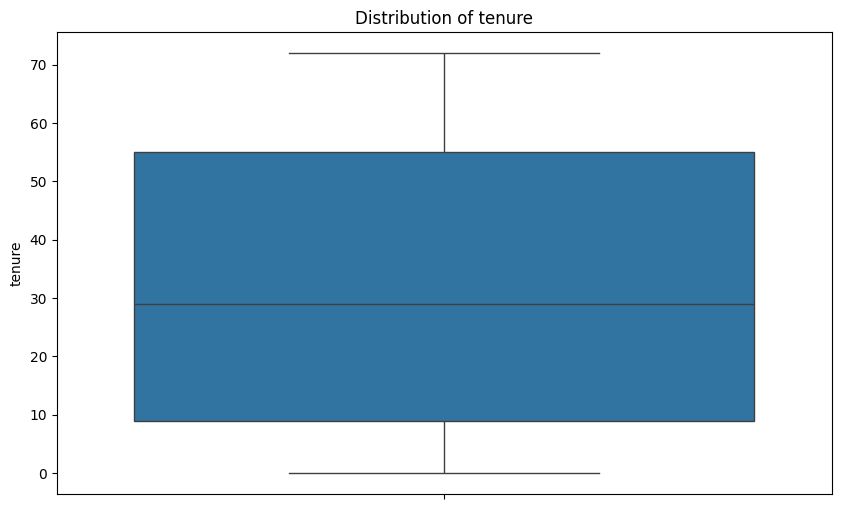

In [131]:
plot_box(df,'tenure')

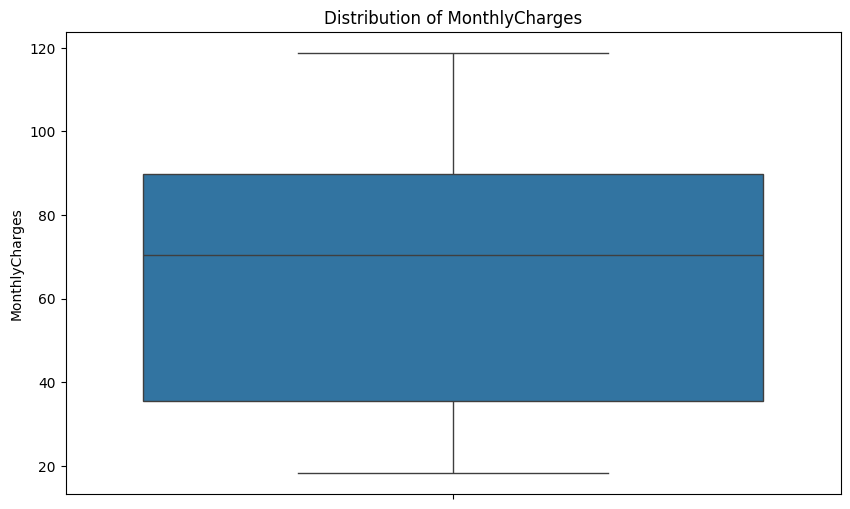

In [132]:
plot_box(df,'MonthlyCharges')

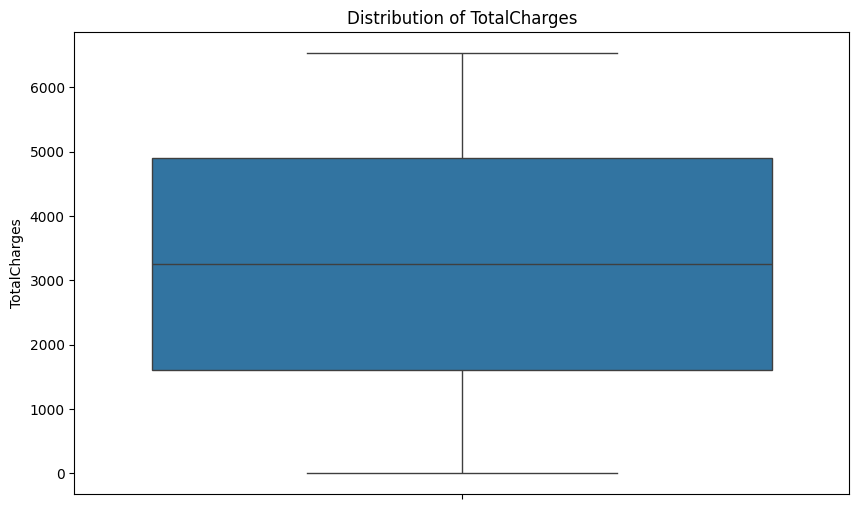

In [133]:
plot_box(df,'TotalCharges')

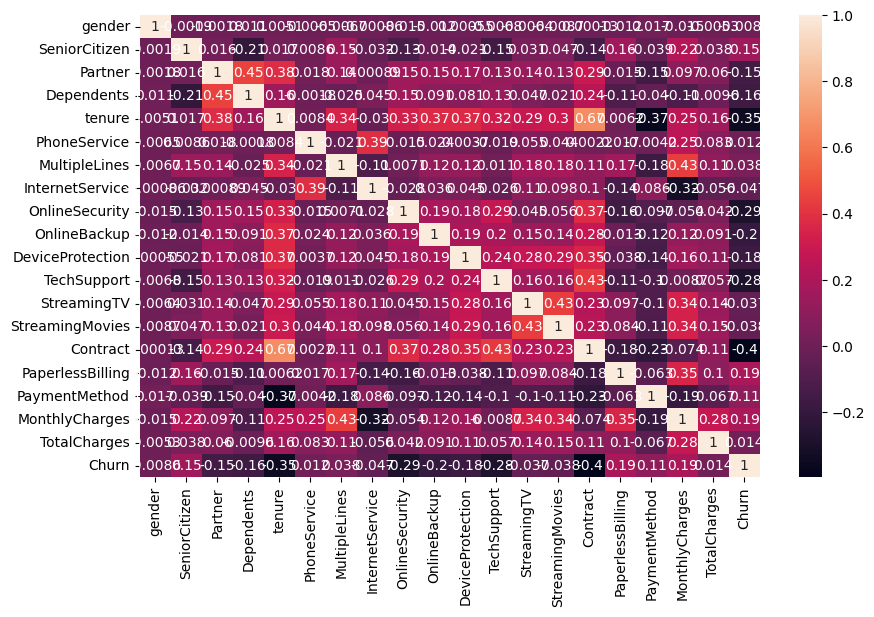

In [134]:
# corrlation heatmap for numrical columns
plt.figure(figsize=(10,6))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(),annot=True)
plt.show()

In [135]:
#catorical fetaures analysis
df.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


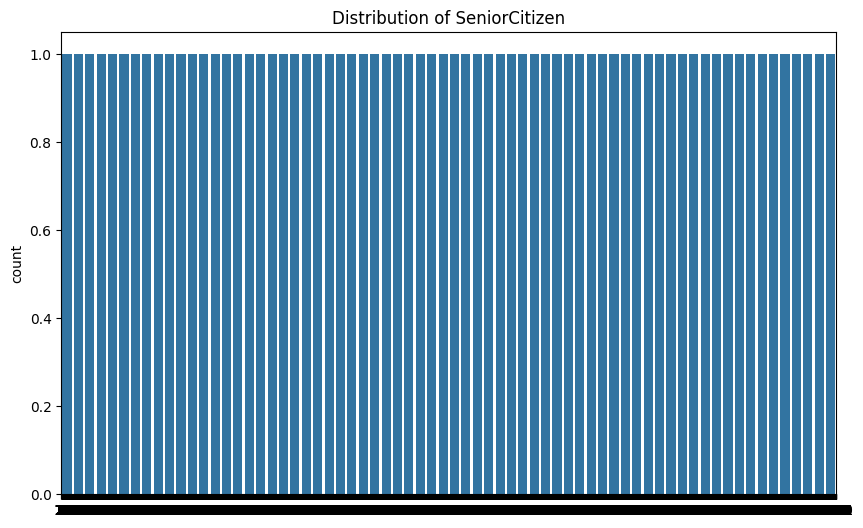

In [136]:
object_col=df.select_dtypes(include='object').columns.to_list()

object_col=["SeniorCitizen"]+object_col

for col in object_col:
  plt.figure(figsize=(10,6))
  sns.countplot(df[col])
  plt.title(f"Distribution of {col}")
  plt.show()


**Data preprossing **

In [137]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


Label encoding of target columns

In [138]:
#Label encoding of target columns
df['Churn']=df['Churn'].replace({'Yes':1,"No":0})


In [139]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1


In [140]:
print(df['Churn'].value_counts)

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64>


Label encoding of categorical columns

In [141]:
# identifying columns with object datatype

object_col= df.select_dtypes(include="object").columns

In [142]:
print (object_col
       )

Index([], dtype='object')


In [143]:
# initizlize a dictionry to save the encoders
encoders={}
# identify columns with object datatype excluding 'customerID' as it's dropped later
object_col= df.select_dtypes(include="object").columns.drop('customerID', errors='ignore')

# apply label encoding and store the encoders by fitting on the original string values
# Create a copy of the original dataframe to fit encoders before transformation
df_original_for_encoding = df.copy()
for col in object_col:
  le=LabelEncoder()
  le.fit(df_original_for_encoding[col]) # Fit on original string values
  df[col]=le.transform(df[col]) # Transform the main dataframe
  encoders[col]=le

# save the encoders to pickle file
import pickle
with open('encoders.pkl','wb') as f:
  pickle.dump(encoders,f)

In [144]:
encoders

{}

In [145]:
df .head ()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [146]:
#customerID dlete this clumns
df.drop('customerID',axis=1,inplace=True)

KeyError: "['customerID'] not found in axis"

In [ ]:
df.head()

Training and test  split

In [ ]:
# spliting the featuers and target
X=df.drop('Churn',axis=1)
y=df['Churn']

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
# split tarning and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print (X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

Synthetic Minority Oversampling Technique SMOTE

In [ ]:

smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [ ]:
print(X_train_smote.shape)
print(y_train_smote.shape)

In [ ]:
print(y_train_smote.value_counts())


Modle training

training with defdalut hyperparameters

In [ ]:
# dictionary of models
models={
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'XGBoost':XGBClassifier()
}

In [113]:

# dictionary to store the cross validation results
cv_results={}

# prefrom s-fold cross validation for each model
for model_name,model in models.items():
  print(f"Training {model_name} model")
  cv_scores=cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring='accuracy')
  cv_results[model_name]=cv_scores
  print(f"{model_name} cross validation accuracy: {cv_scores.mean():.2f}")

Training DecisionTree model
DecisionTree cross validation accuracy: 0.79
Training RandomForest model
RandomForest cross validation accuracy: 0.84
Training XGBoost model
XGBoost cross validation accuracy: 0.83


In [114]:
print(cv_results)

{'DecisionTree': array([0.69021739, 0.71963746, 0.82296073, 0.84531722, 0.84954683]), 'RandomForest': array([0.72342995, 0.76253776, 0.9021148 , 0.8918429 , 0.8978852 ]), 'XGBoost': array([0.69987923, 0.74441088, 0.90392749, 0.89244713, 0.9021148 ])}


Random Forest higset accuarcy score compare to onthers

In [115]:
rfc=RandomForestClassifier()
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier()

6.**Model Evalution**

In [116]:
# evalution on test and train data
y_pred_train=rfc.predict(X_train_smote)
y_pred_test=rfc.predict(X_test)

print("Training accuracy:",accuracy_score(y_train_smote,y_pred_train))
print("Testing accuracy:",accuracy_score(y_test,y_pred_test))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_test))
print("Classification report:")
print(classification_report(y_test,y_pred_test))


Training accuracy: 0.998912518124698
Testing accuracy: 0.7764371894960965
Confusion matrix:
[[880 156]
 [159 214]]
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.57      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [117]:
#save the picakle model file
import pickle
# Get feature names from the training data
feature_name = X_train_smote.columns.tolist()
# Create a dictionary to save the model and feature names
model_data = {
    'model': rfc,
    'feature_name': feature_name
}
with open('rfc_model.pkl','wb') as f:
  pickle.dump(model_data,f)

**7.Lode the saved model and build a prediction System**

In [118]:
# load the saved model and the fetaures names
import pickle
with open('rfc_model.pkl','rb') as f:
  loaded_data = pickle.load(f)

loaded_model = loaded_data['model']
feature_name = loaded_data['feature_name']

In [119]:
print(loaded_model)

RandomForestClassifier()


In [120]:
print(feature_name)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No

In [149]:
new_customer_data_dict = {
    'gender': 'Female', # Needs to be encoded (0 for Female, 1 for Male)
    'SeniorCitizen': 0, # Already numeric (0 or 1)
    'Partner': 'Yes', # Needs to be encoded (0 for No, 1 for Yes)
    'Dependents': 'No', # Needs to be encoded (0 for No, 1 for Yes)
    'tenure': 1, # Already numeric
    'PhoneService': 'No', # Needs to be encoded (0 for No, 1 for Yes)
    'MultipleLines': 'No phone service', # Needs to be encoded (0 for No, 1 for Yes, 2 for No phone service)
    'InternetService': 'DSL', # Needs to be encoded (0 for DSL, 1 for Fiber optic, 2 for No)
    'OnlineSecurity': 'No', # Needs to be encoded (0 for No, 1 for Yes, 2 for No internet service)
    'OnlineBackup': 'Yes', # Needs to be encoded (0 for No, 1 for Yes, 2 for No internet service)
    'DeviceProtection': 'No', # Needs to be encoded (0 for No, 1 for Yes, 2 for No internet service)
    'TechSupport': 'No', # Needs to be encoded (0 for No, 1 for Yes, 2 for No internet service)
    'StreamingTV': 'No', # Needs to be encoded (0 for No, 1 for Yes, 2 for No internet service)
    'StreamingMovies': 'No', # Needs to be encoded (0 for No, 1 for Yes, 2 for No internet service)
    'Contract': 'Month-to-month', # Needs to be encoded (0 for Month-to-month, 1 for One year, 2 for Two year)
    'PaperlessBilling': 'Yes', # Needs to be encoded (0 for No, 1 for Yes)
    'PaymentMethod': 'Electronic check', # Needs to be encoded (0 for Bank transfer (automatic), 1 for Credit card (automatic), 2 for Electronic check, 3 for Mailed check)
    'MonthlyCharges': 29.85, # Already numeric
    'TotalCharges': 29.85 # Already numeric
}

print(new_customer_data_dict)

# Load the encoders if not already loaded
import pickle
with open('encoders.pkl','rb') as f:
  encoders=pickle.load(f)

# Create a new dictionary with encoded values
encoded_data_dict = {}
for col, value in new_customer_data_dict.items():
    if col in encoders:
        # Ensure the value is in a list or array format for transform
        # Use the scalar value directly from the transform output
        encoded_data_dict[col] = encoders[col].transform([str(value)])[0]
    else:
        encoded_data_dict[col] = value # Keep non-categorical values as they are

# Create a DataFrame from the encoded dictionary
new_customer_data_df = pd.DataFrame([encoded_data_dict])

# Explicitly set dtypes for encoded categorical columns
categorical_cols_encoded = [col for col in feature_name if col in encoders]
for col in categorical_cols_encoded:
    if col in new_customer_data_df.columns:
        new_customer_data_df[col] = new_customer_data_df[col].astype('int64')


# Ensure the new data point has the same columns and order as the training data
# (using the feature_name loaded with the model)
new_customer_data_df = new_customer_data_df.reindex(columns=feature_name, fill_value=0)


# Print the data types of the DataFrame before prediction
print(new_customer_data_df.dtypes)


# Make a prediction using the loaded model
# Assuming loaded_model is already loaded from cell tjDr73I-tD67
if 'loaded_model' in locals():
    prediction = loaded_model.predict(new_customer_data_df)

    # Print the prediction
    if prediction[0] == 1:
      print("The model predicts that the customer will churn.")
    else:
      print("The model predicts that the customer will not churn.")
else:
    print("Error: loaded_model is not loaded. Please run the cell to load the model and feature names.")

{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 1, 'PhoneService': 'No', 'MultipleLines': 'No phone service', 'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No', 'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'MonthlyCharges': 29.85, 'TotalCharges': 29.85}
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: ob

ValueError: could not convert string to float: 'Female'